# Prepare

In [1641]:
# prepare libraries
import pandas as pd
import numpy as np
from urllib import request # read files
import re
import os
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.corpus import state_union
from nltk.corpus import brown
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import words
from ast import literal_eval # transform data type
from collections import Counter
from wordcloud import WordCloud, STOPWORDS # wordcloud

# Processing real text (from out on the inter-webs)

## Exercise 1 Preprocessing the ZeldaWiki text. Follow the bullets below for each character in your character list:

### Read the file containing the character's page description

In [142]:
path = './CharacterExplainText/'
character_list = os.listdir(path)

In [509]:
def read_description(character):
    with open('./CharacterExplainText/{}.txt'.format(character),encoding='utf-8') as f:
        return f.read()

In [510]:
raw = read_description('Link')
print(raw[:100])

For other characters named Link featured in the series, see Link (Disambiguation).

Link is the name


### Filter out the headers of sections by using `re.sub(pattern,'',DESCRIPTION_HERE)`

In [10]:
help(re.sub)

Help on function sub in module re:

sub(pattern, repl, string, count=0, flags=0)
    Return the string obtained by replacing the leftmost
    non-overlapping occurrences of the pattern in string by the
    replacement repl.  repl can be either a string or a callable;
    if a string, backslash escapes in it are processed.  If it is
    a callable, it's passed the Match object and must return
    a replacement string to be used.



In [513]:
filtered_raw = re.sub('=+.*=','',raw)
print(filtered_raw[:200])

For other characters named Link featured in the series, see Link (Disambiguation).

Link is the name shared by the recurring character in The Legend of Zelda series. There are many incarnations of Lin


### Exclude characters names (since we're interested in the words, not the names) before tokenizing

In [514]:
tokens = nltk.wordpunct_tokenize(filtered_raw)
name_excluded_tokens = [i for i in tokens if i.lower() not in splited_name_lst]
print(name_excluded_tokens)

['For', 'other', 'characters', 'named', 'featured', 'in', 'series', ',', 'see', 'Disambiguation', ').', 'is', 'name', 'shared', 'by', 'recurring', 'character', 'in', 'Legend', 'of', 'series', '.', 'There', 'are', 'many', 'incarnations', 'of', ',', 'each', 'possessing', 'spirit', 'of', 'hero', ',', 'with', 'some', 'of', 'them', 'being', 'blood', '-', 'related', 'as', 'well', '.', 'They', 'are', 'chosen', 'by', 'Goddesses', 'protect', 'land', 'from', 'evil', 'whenever', 'deemed', 'necessary', '.', 'They', 'often', 'need', 'complete', 'series', 'of', 'trials', 'mature', 'into', 'chosen', 'hero', '.', 'In', 'most', 'games', 'of', 'Legend', 'of', 'series', ',', 'their', 'adventures', 'take', 'place', 'within', 'Kingdom', 'of', 'Hyrule', ',', 'traveling', 'through', 'land', ',', 'collecting', 'important', 'items', ',', 'and', 'defeating', 'wide', 'variety', 'of', 'enemies', 'while', 'trying', 'save', 'both', 'and', 'her', 'kingdom', 'from', 'clutches', 'of', 'or', 'other', 'villains', '.', '

### Tokenize your text with WordPunctTokenizer

https://stackoverflow.com/questions/50240029/nltk-wordpunct-tokenize-vs-word-tokenize

### Exclude punctuation and stop words.

In [188]:
from nltk.corpus import stopwords
stpwds = stopwords.words('english')
# exclude stopwords and punctuation and saved by lower format
words_fd_exclude = [w.lower() for w in filtered_raw if w.lower() not in stpwds and w.isalpha()]

In [189]:
words_fd_exclude

['may',
 'refer',
 'shrine',
 'ancient',
 'shrine',
 'eldin',
 'canyon',
 'monk',
 'designed',
 'eponymous',
 'shrine']

### Lemmatize your words with `nltk.WordNetLemmatizer()`

**a good choice if you want to compile the vocabulary of some texts and want a list of valid lemmas (or lexicon headwords).**

In [157]:
wnl = nltk.WordNetLemmatizer()
[wnl.lemmatize(t) for t in words_fd_exclude]

['may',
 'refer',
 'shrine',
 'ancient',
 'shrine',
 'eldin',
 'canyon',
 'monk',
 'designed',
 'eponymous',
 'shrine']

### Generalized function for preprocession

In [1080]:
df_characters = pd.read_csv("./ZeldaBotW_nodes_w_attributes_enriched.csv")
name_lst = list(df_characters.Name)

**Create a list with all names splited by first name and second name**

In [824]:
# collecting names with word_tokenize which will differentiate first name and second name while remaining special characters
splited_name_lst = []
for i in name_lst:
    # lower each name for convenience
    tokens = nltk.word_tokenize(i)
    if len(tokens) < 4:
        splited_name_lst.extend(tokens)
    elif '(' in tokens:
        if len(tokens) > 6:
            splited_name_lst.extend(tokens[0:-6])
        else:
            splited_name_lst.extend(tokens[0:-3])

In [695]:
# There are some common words which are also names, such as Water,Stone etc. 
# Those words are controvosial so we have to think more when try to exclude them
controversial_names = set(words.words())&set([w.lower() for w in splited_name_lst])

In [713]:
controversial_names

{'a',
 'ami',
 'aster',
 'bamboo',
 'beast',
 'benny',
 'black',
 'blue',
 'bolson',
 'bosh',
 'calamity',
 'cherry',
 'cree',
 'cursed',
 'dah',
 'danda',
 'danton',
 'dark',
 'dauntless',
 'decayed',
 'dow',
 'eighth',
 'electric',
 'fin',
 'fire',
 'forest',
 'frost',
 'gee',
 'giro',
 'golden',
 'great',
 'guardian',
 'guy',
 'ha',
 'hah',
 'harry',
 'heroine',
 'hia',
 'horned',
 'horse',
 'huck',
 'i',
 'ice',
 'jinn',
 'ka',
 'kai',
 'kala',
 'katha',
 'kay',
 'keek',
 'keet',
 'king',
 'kish',
 'koko',
 'kula',
 'laine',
 'liana',
 'link',
 'lo',
 'lorn',
 'lota',
 'man',
 'manny',
 'mary',
 'master',
 'mina',
 'mo',
 'monk',
 'naga',
 'nat',
 'naw',
 'o',
 'old',
 'pasha',
 'piaffe',
 'prima',
 'princess',
 'qua',
 'quince',
 'rah',
 'rata',
 'ree',
 'rex',
 'rima',
 'rock',
 'rohan',
 'rokee',
 'rota',
 'sah',
 'saki',
 'sasa',
 'scout',
 'senna',
 'sentry',
 'seven',
 'sha',
 'shay',
 'shee',
 'sho',
 'silver',
 'sky',
 'snow',
 'soh',
 'stalker',
 'statue',
 'steen',
 'ston

In [866]:
def preprocess_zeldawiki(filename):
    # read txt file
    with open('./CharacterExplainText/'+filename,encoding='utf-8') as f:
        raw = f.read()
    
    # filter out headers
    filtered_raw = re.sub('=+.*=','',raw)
    
    # Exclude stopwords and punctuation 
    # Save each word to lower case
    tokens = nltk.wordpunct_tokenize(filtered_raw)
    stpwds = stopwords.words('english')
    exclude_stpwds = [w for w in tokens if w.lower() not in stpwds and w.isalpha()]

    # Exclude characters names
    # (since we're interested in the words, not the names) 
    wnl = nltk.WordNetLemmatizer() 
    '''
    clean_tokens = [i for i in exclude_stpwds if \
                    wnl.lemmatize(i) not in splited_name_lst and \ 
                    wnl.lemmatize(i).capitalize() not in splited_name_lst\ and
                   ]
    '''
    clean_tokens = []
    for i in exclude_stpwds:
        if i.istitle() and i not in splited_name_lst and i+s not in splited_name_lst:
            if wnl.lemmatize(i.lower())!='link':
                clean_tokens.append(i)
        else:
            if wnl.lemmatize(i).capitalize() not in splited_name_lst:
                if wnl.lemmatize(i)!='link':
                    clean_tokens.append(i)
            elif wnl.lemmatize(i).capitalize() in splited_name_lst and i in controversial_names:
                if wnl.lemmatize(i)!='link':
                    clean_tokens.append(i)
            
    # Lemmatize 
    lemmatized_tokens = [wnl.lemmatize(t.lower()) for t in clean_tokens]
    
    return lemmatized_tokens

**NB:**In Zelda story,The main character, Link, would have various avatars when he got a legendary sword. So in the description, there are words like Links to indicate all those Link avatars. Same happens like common names can appear with Upper-, Lower-case, and plural forms.For example, Bokoblin, Bokoblins are both need to be deleted. To eliminate name variates, I use `Lemmatize` first to find the root of the name. So in judgement sentence, no matter how character name changes, we can still filter them out.

## Exercise 2 Frequency distribution. Now that we have preprocess the ZeldaWiki pages:

### join them all together and convert them with `nltk.Text()`

In [867]:
zeldawiki_preprocessed_tokens = []
# join all each tokens together
for i in character_list:
    text = preprocess_zeldawiki(i)
    zeldawiki_preprocessed_tokens.extend(text)

In [868]:
with open('zeldawiki_preprocessed.txt',mode='w',encoding='utf-8') as f:
    f.write('{}\n'.format(zeldawiki_preprocessed_tokens))
    f.close()

In [869]:
preprocessed_tokens = nltk.Text(zeldawiki_preprocessed_tokens)

In [870]:
preprocessed_tokens

<Text: character breath wild life hateno village east necluda...>

In [871]:
len(preprocessed_tokens)

81626

In [1082]:
preprocessed_tokens.concordance('link')

no matches


###  create frequency distribution including the cumulative frequency plot for the 75 most common words.

In [874]:
fdist = nltk.FreqDist(preprocessed_tokens)
print(fdist)

<FreqDist with 7509 samples and 81626 outcomes>


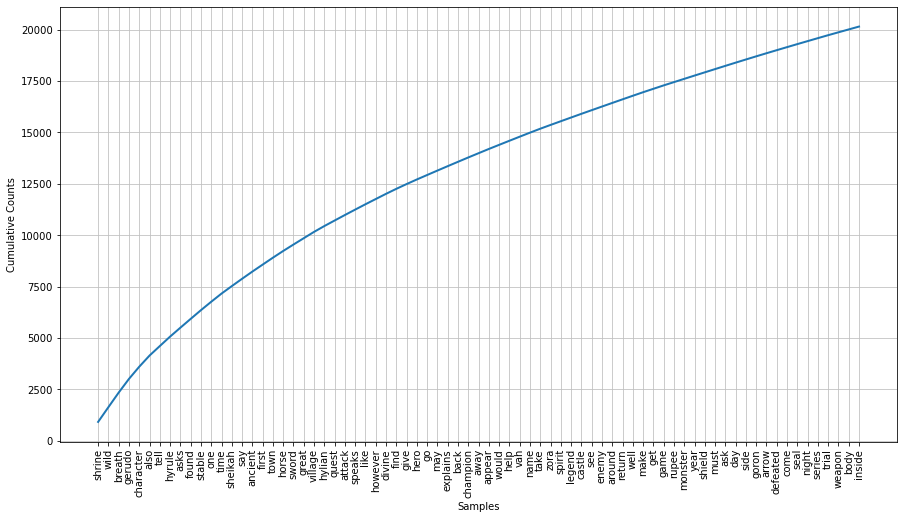

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [875]:
plt.figure(figsize=(15,8))
fdist.plot(75, cumulative=True)

### How does your new distribution differ from the one you found in Week 6?

1. The top cumulative count is only 1/6 of previous one, which means the top words appear relatively less frequently.
2. The disparity between top1 and top75 is more distinct in this distribution, with bottom/top count ratio of about 0.06 compared to last one with about 0.17.

# Words that characterize the characters

## TF-IDF
What: 用于信息检索与数据挖掘的常用加权技术 term-weighting schemes   
Core: 假设字词的重要性  weighting factor    
Goal: reflect how important a word is to a document in a collection or corpus   
Example:  often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.   
向量空间模型就是希望把查询关键字和文档都表达成向量，然后利用向量之间的运算来进一步表达向量间的关系

### Explain in your own words the point of TF-IDF.
**What does TF stand for?**<br>
TF(Term frequency), means the number of times a term occurs in a document.We evaluate the relevance of a query and documents by calculating its term frequency. The implicit assumption behind TF is that keywords in query should be more important than other words. For example, if we query the word 'car', we count the number of times 'car'occuring in each document. If 'car' occurs more in document A than in document B. We say A is more relevant to 'car'. This is to say, the weight of a term that occurs in a document is simply proportional to the term frequency.

**What does IDF stand for?**<br>
IDF(inverse document frequency) is a measure of how much information the word provides. Since there are some common words, like 'the','a', basically occuring in every document. They have a very high term frequency which causes the less-common but informative words overshadowed. If a word is frequent in a large number of documents, it displays less importance.  Hence, an inverse document frequency factor is introduced taking advantage of the concept of 'penalty', which diminishes  the weight of terms that occur very frequently in the document set and increases the weight of terms that occur rarely.

### Since we want to find out which words are important for each race, we're going to create one document per race in BotW. Thus, combine the ZeldaWiki pages into one long list per race.

We can loop each race of characters by `.unique()` method and create new list for each race to store corresponding words.

In [1336]:
df_characters['Race'].unique()

array(['Hylian', 'Horse', 'Goron', 'Human', 'Dragon', 'Rito', 'Unknown',
       'Korok', 'Zora', 'Sheikah', 'Gerudo', 'Great Fairy', 'Ancient Orb',
       'Sand Seal', 'Dog', 'Bokoblin', 'Lizalfos', 'Moblin', 'Wizzrobe',
       'Lynel', 'Chuchu', 'Guardian', 'Keese', 'Octorok', 'Talus',
       'Hinox', 'Molduga'], dtype=object)

In [1472]:
# create documents saving words to one long list according to Column(ie Race, Gender, Role)
def save_byColumn(col):
    for i in df_characters[col].unique():
        temp = []    
        if ' ' in i:
            racename = i.replace(' ','_')
            df_characters.query("{} == '{}'".format(col,i)).\
                        Name.map(lambda x:temp.extend(preprocess_zeldawiki(x+'.txt')))

        else:
            df_characters.query("{} == '{}'".format(col,i)).\
                        Name.map(lambda x:temp.extend(preprocess_zeldawiki(x+'.txt')))

        filename = './Character_Text_{}/{}.txt'.format(col,i)
        with open(filename,mode='w',encoding='utf-8') as f:
            f.write('{}\n'.format(temp))

In [1020]:
save_byColumn('Race')

### Now, we're ready to calculate the TF for each word. Use the method of your choice to find the top 5 terms within each race.
Describe similarities and differences between races.
Even though some terms might be descriptive, why are TFs not necessarily a good description of the races?

In [1475]:
# calculate the TF for each word in named coloumn e.g. df_each_tf('Race',Hylian')
# return a dataframe containing 4 columns: Word, Count, TF and Value(the wanted value in your named column)
def df_each_tf(col,value):
    from collections import Counter
    filename = './Character_Text_{}/{}.txt'.format(col,value) 
    with open(filename,mode='r',encoding='utf-8') as f:
        raw = f.read()
        # str to list
        words_list = literal_eval(raw)
        # count the number of times each word occurs in a list
        tf_list = Counter(words_list)
        # dict to dataframe — pd.DataFrame.from_dict()
        df_count = pd.DataFrame.from_dict(tf_list,orient='index',columns=['Count']).\
                        sort_values(by='Count',ascending=False) #sort from high to low
        df_count = df_count.reset_index().rename(columns = {'index':'Word'})
        total_number = df_count['Count'].sum()
        df_count['TF'] = [i/total_number for i in df_count['Count']]
        df_count[col] = value
        
        return df_count

In [1558]:
def add_idf_tfidf(col):
    df = pd.DataFrame()
    for i in df_characters[col].unique():
        # 1.calculate TF of a word set within specified col 2.get corresponding dataframe
        df_count = df_each_tf(col,i)
        df = pd.concat([df,df_count],axis=0)
        
    #total number of documents
    N = len(df_characters[col].unique()) 
    nt = np.array([df.Word.value_counts()[i] for i in df.Word])
    df['IDF'] = np.log( N / nt)
    df['IDF_smooth'] = np.log(N / (1+nt))
    #df['IDF_max'] = np.log((nt.max()*nt) / (1+nt))
    #df['IDF_prob'] = np.log((N - nt) / nt)
    df['TF-IDF'] = df['TF']*df['IDF']
    
    return df

In [1502]:
# dataframe: ,col: ,tfidf: TF/IDF/TF-IDF
def show_top5(df,col,tfidf):
    for i in df_characters[col].unique():
        top_5_idf = df.loc[df[col].isin([i])][['Word',tfidf]].sort_values(by=tfidf,ascending=False)
        print('Top 5 words for '+i+' based on '+tfidf)
        print(top_5_idf[0:5])

In [ ]:
df_race_tf = add_idf_tfidf('Race')

**1. Similarities and differences between races**

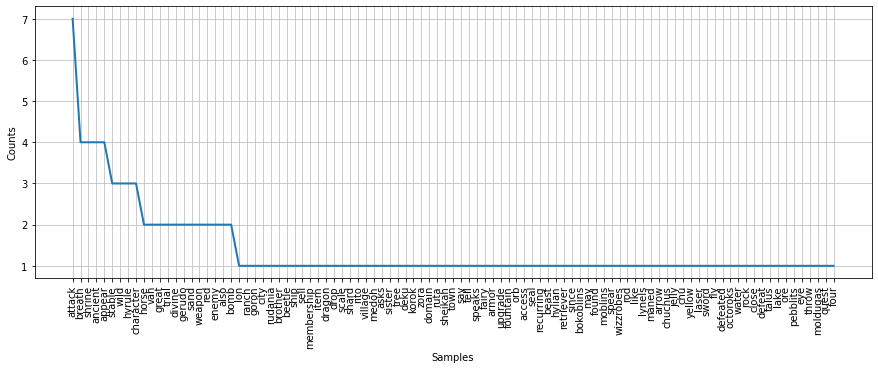

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [1334]:
fdist1 = nltk.FreqDist(nltk.Text(race_top5_agg))
plt.figure(figsize=(15,5))
fdist1.plot()

**Similarities:**<br>
For the top5 tf words,
* 'stable' and 'horse' are both within 'Hylian' and 'Horse'.
* 'attack' can be seen within enemies such as 'Bokoblin','Lizalfos','Hinox'

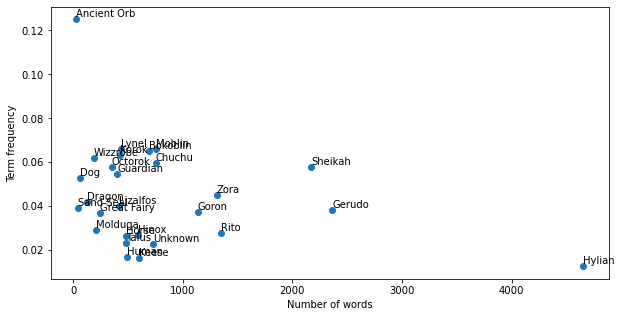

In [1358]:
race_tf_df = df_race_tf.groupby('Race').describe()['TF'][['count','max']].\
    sort_values(by='max',ascending=False)

x1 = race_tf_df['count']
y1 = race_tf_df['max']

plt.figure(figsize=[10,5])
plt.scatter(x1,y1)

# produce a legend with the unique colors from the scatter
for i in range(len(x1)):
    plt.annotate(list(race_tf_df.index)[i], \
                 xy = (x1[i], y1[i]), xytext = (x1[i], y1[i]+0.001)) # 这里xy是需要标记的坐标，xytext是对应的标签坐标

plt.ylabel('Term frequency')
plt.xlabel('Number of words')
plt.show()

**Differences:**
* The disparity on the size of words doesn't really relate to high or low term frequency.
* The top TF word of some races is just their name.

**2. Why are TFs not necessarily a good description of the races?**

* Under the idea of TF, we assume that the more frequent a word occurs in a document,it can better represent this document. For example, when we look at the top5 TF words within Horse race, (horse,stable,character,lon,ranch) It's easy to imagine the characteristics of this race.
* However,there are several words are quite common within different races such as 'attack' occurs 7 times and 'breath' occurs 4 times among 27 races, while they literally have ambiguous meaning. If we are familiar with `Information Theory`, we know that uncertainty generally means more informative. 
* Hence, <u>words that really carry relevant useful information may only appear in relatively few, sometimes very few documents rather than commonly shown in a great number of documents.</u>

### Next, we calculate IDF and TF-IDF for every word.

In [1578]:
df_race_tf.head()

Word  Count        TF    Race       IDF  IDF_smooth    TF-IDF
0  stable    377  0.012636  Hylian  0.993252    0.897942  0.012551
1   horse    296  0.009921  Hylian  1.686399    1.504077  0.016731
2    wild    276  0.009251  Hylian  0.037740    0.000000  0.000349
3  hyrule    271  0.009083  Hylian  0.204794    0.160343  0.001860
4  breath    243  0.008145  Hylian  0.037740    0.000000  0.000307

**1. What base logarithm did you use? Is that important?**

I tried 4 variants of IDF algorithmns.They are important for calculating IDF in different situations.We have to decide which to use based on our data. <br>
1. classic inverse document frequency:Avoiding TF linear growth by logarithmic functions. 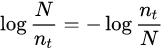 Note that the value of TF has no upper limit in the original definition.Although we generally believe that a document contains a query  many times and relatively expresses a certain degree of correlation, which is hard to say linear. For example, document A may contain the word "car" 100 times, while document B may contain A 200 times. But this doesn't mean that document B is twice as relevant as document A.Thus, after exceeding a certain threshold, the TF is not so differentiated.
2. inverse document frequency max<br>
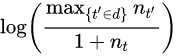 classic inverse document frequency dosen't consider the lengths of documents. If  document A has 3,000 words, document B has 250 words. For term 'car' occurs both 20 times within A and B, we can't say they are equally relevant.So IDF is 'normalized'  according to the standardization of the maximum TF value of the document.
3. inverse document frequency smooth<br>
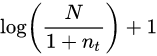 Instead of using IDF directly as a "penalty factor", inverse document frequency smooth uses N + 1 and divide it by DF as the reciprocal of a new DF, and then change it by a logarithm on this basis
4. probabilistic inverse document frequency
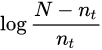

<br>NB: nt is the number of documents where the term t appears.  

**2. List the 5 top words for each race.Are these 5 words more descriptive of the race? If yes, what is it about IDF that makes the words more informative?**

In [1560]:
show_top5(df_race_tf,'Race','TF-IDF')

Top 5 words for Hylian based on TF-IDF
         Word    TF-IDF
1       horse  0.016731
0      stable  0.012551
35   triforce  0.006113
21     hateno  0.005935
5   character  0.005757
Top 5 words for Horse based on TF-IDF
     Word    TF-IDF
0   horse  0.044841
3     lon  0.030089
9    ingo  0.026672
14  malon  0.022861
4   ranch  0.022076
Top 5 words for Goron based on TF-IDF
       Word    TF-IDF
0     goron  0.055954
1      city  0.028395
4   brother  0.021205
10     mine  0.019085
3   rudania  0.018727
Top 5 words for Human based on TF-IDF
          Word    TF-IDF
3   membership  0.043252
1         ship  0.037572
0       beetle  0.032577
5          bug  0.027325
13    discount  0.021626
Top 5 words for Dragon based on TF-IDF
       Word    TF-IDF
3     shard  0.059604
0    dragon  0.056676
2     scale  0.043730
11  roaming  0.039736
34     claw  0.029802
Top 5 words for Rito based on TF-IDF
       Word    TF-IDF
0      rito  0.047011
14     nest  0.020717
1   village  0.020088
15  w

The top words are more descriptive of each race now.Instead of 'Attack', many meaningful and  race-relating words occurs.

### Normally, TF-IDF is used for single documents. What does TF-IDF tell us about the content of a single document in a collection.

It is used to evaluate the importance of a word to a document set or a single document in a collection. The importance of a word increases with the number of times it appears in the document, but decreases inversely with the frequency of its appearance in the whole documents. It is often used as a weighting factor for search information retrieval, text mining and user modeling.

# WordClouds¶

## Exercise 4 Plot the wordclouds

In [1576]:
gender_tf[gender_tf['Gender']=='Male']

Word  Count        TF Gender  IDF_smooth    TF-IDF
0          shrine    735  0.020026   Male   -0.287682 -0.005761
1            wild    416  0.011335   Male   -0.287682 -0.003261
2          breath    386  0.010517   Male   -0.287682 -0.003026
3       character    356  0.009700   Male   -0.287682 -0.002790
4         sheikah    301  0.008201   Male   -0.287682 -0.002359
...           ...    ...       ...    ...         ...       ...
5108        veiny      1  0.000027   Male    0.405465  0.000011
5109      largest      1  0.000027   Male   -0.287682 -0.000008
5110     indicate      1  0.000027   Male    0.000000  0.000000
5111     commerce      1  0.000027   Male    0.405465  0.000011
5112  desperation      1  0.000027   Male    0.405465  0.000011

[5113 rows x 6 columns]

In [1583]:
def generate_wordcloud(df,col):
    for i in df[col].unique():
        fq = df[df[col]==i].set_index(['Word'])['TF-IDF'].to_dict()
        print(i)
        wordcloud = WordCloud(
            stopwords=STOPWORDS,
            background_color='white',
            width=1800,
            height=1400,
            collocations=False
        ).generate_from_frequencies(fq)

        plt.imshow(wordcloud)
        plt.axis('off')
        plt.show()

###  create a word-cloud for each race

Hylian


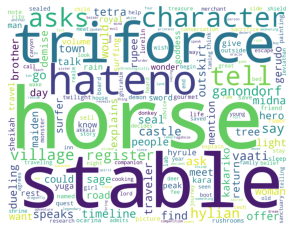

Horse


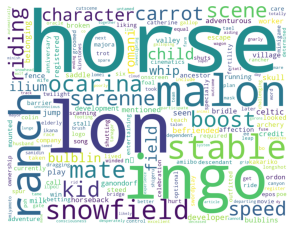

Goron


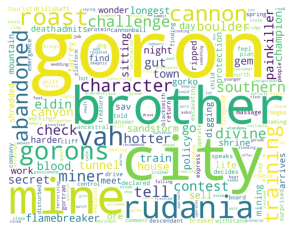

Human


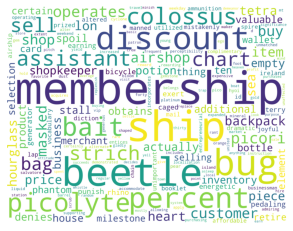

Dragon


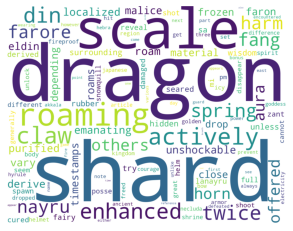

Rito


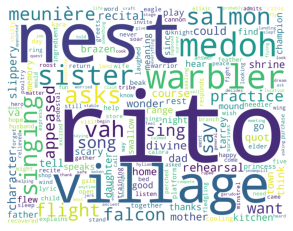

Unknown


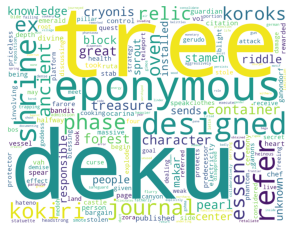

Korok


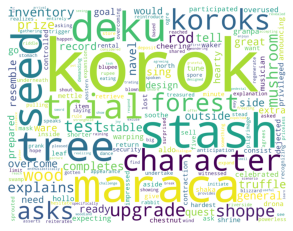

Zora


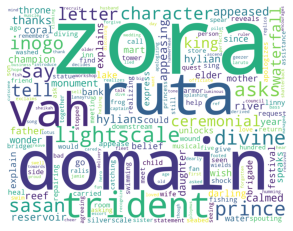

Sheikah


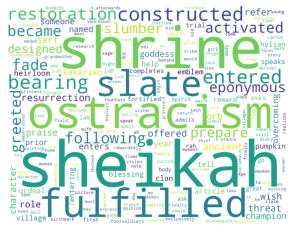

Gerudo


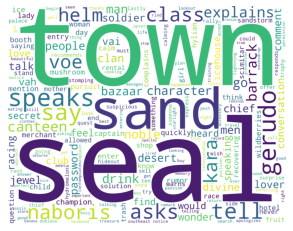

Great Fairy


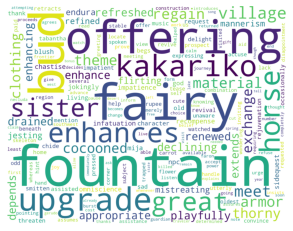

Ancient Orb


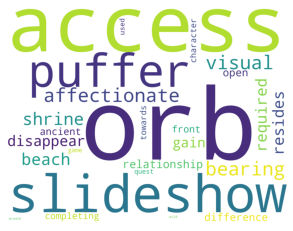

Sand Seal


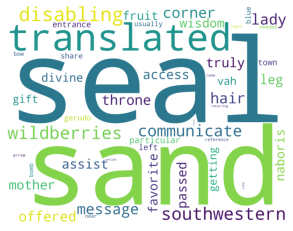

Dog


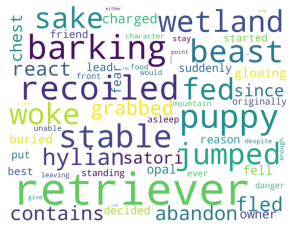

Bokoblin


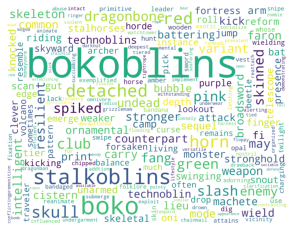

Lizalfos


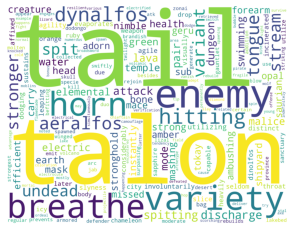

Moblin


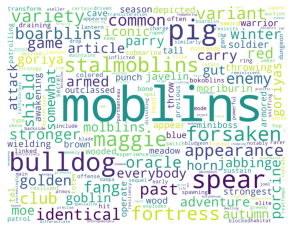

Wizzrobe


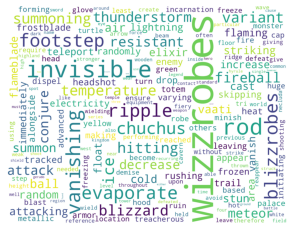

Lynel


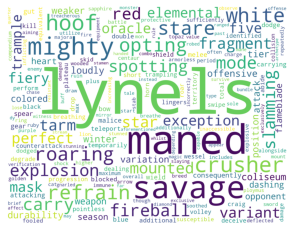

Chuchu


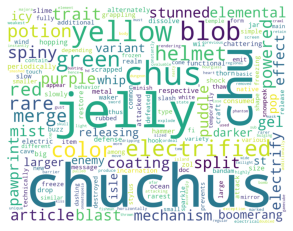

Guardian


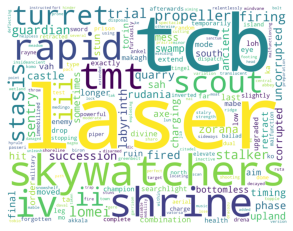

Keese


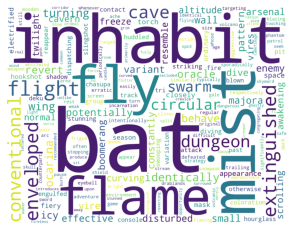

Octorok


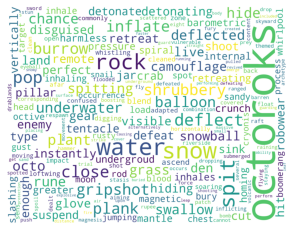

Talus


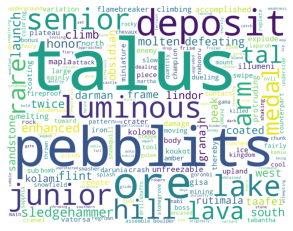

Hinox


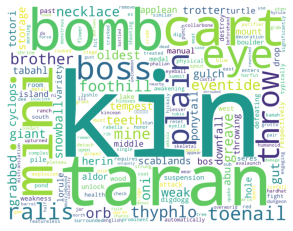

Molduga


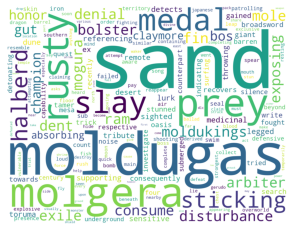

In [1585]:
generate_wordcloud(df_race_tf,'Race')

## Exercise 5
According to TF-IFD: what are the 5 top words for each role? and for each gender?
Plot their wordclouds!

My TF-IDF Pipeline: save_byColumn—>df_each_tf—>add_idf_tfidf—>show_top5—>wordcloud
1. save_byColumn:
2. df_each_tf:
3. add_idf_tfidf:
4. show_top5
5. wordcloud:

In [1504]:
for i in ['Gender','Role']:
    save_byColumn(i)

In [1577]:
for i in df_characters.Gender.unique():
    gender_tf = add_idf_tfidf('Gender')
show_top5(gender_tf,'Gender','TF-IDF')

Top 5 words for Male based on TF-IDF
           Word    TF-IDF
83  constructed  0.001946
91    activated  0.001886
92      entered  0.001856
97    ostracism  0.001826
37         year  0.001160
Top 5 words for Unknown based on TF-IDF
       Word    TF-IDF
24   lynels  0.004808
25  variant  0.004737
4   chuchus  0.003392
41    jelly  0.003111
6   moblins  0.003079
Top 5 words for Female based on TF-IDF
         Word    TF-IDF
10     speaks  0.002235
146   canteen  0.001309
194     drink  0.001084
210       voe  0.001009
242  timeline  0.000935


In [ ]:
fq = gender_tf.set_index(['Word'])['TF-IDF'].to_dict()
wordcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    width=1800,
    height=1400,
    collocations=False
).generate_from_frequencies(fq)

Male


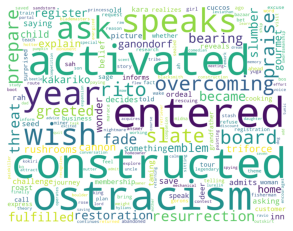

Unknown


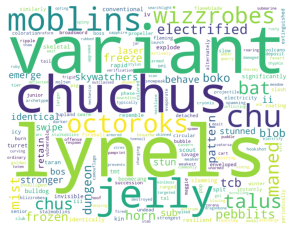

Female


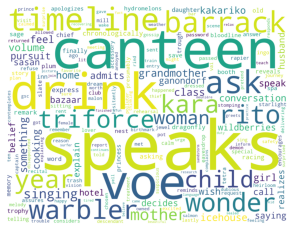

In [1584]:
generate_wordcloud(gender_tf,'Gender')

In [1579]:
for i in df_characters.Role.unique():
    role_tf = add_idf_tfidf('Role')
show_top5(role_tf,'Role','TF-IDF')

Top 5 words for Ally based on TF-IDF
         Word    TF-IDF
7      stable  0.007090
4   character  0.003647
6        asks  0.002666
45        ask  0.002625
59       rito  0.002224
Top 5 words for Enemy based on TF-IDF
       Word    TF-IDF
16   lynels  0.006322
3   chuchus  0.004461
29    jelly  0.004091
5   moblins  0.004049
34      chu  0.003812
Top 5 words for Boss based on TF-IDF
       Word    TF-IDF
7     talus  0.006689
122   taran  0.001873
125     kin  0.001873
142  blight  0.001605
134  ganons  0.001605


Ally


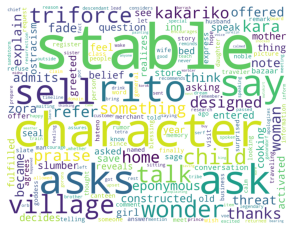

Enemy


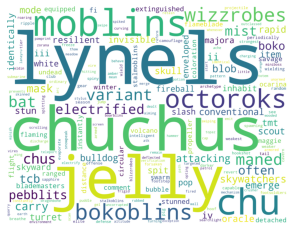

Boss


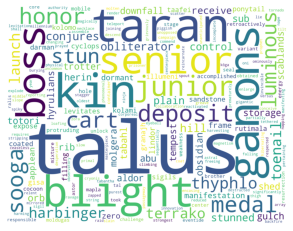

In [1587]:
generate_wordcloud(role_tf,'Role')

# Community detection

## Exercise 6: Use the concept of modularity to explore how community-like the races are

### Explain the concept of modularity in your own words.

It was designed to measure how good a division of a network into communities. Firstly, we should have an abstract understanding of community. Generally speaking, community refers to a large connected component in a network. There are more links / connections between nodes inside a community than in the outside world. Modularity starts from this concept and measures the division by comparing the internal and external connections of the community.<br>
The ratio of the total number of edges within the community to the total number of edges in the network minus an expected value. The expected value is the ratio of the total number of edges within the community and the total number of edges in the network formed by the same community allocation when the network is set as a random network.

### Consider the undirected version of the network (we consider the GCC as in the previous weeks).

**Get undir GCC**

In [1655]:
undir_larG = nx.read_gpickle("./zelda_GCC.pkl")

**Create your own partition into communities, by dividing each character according to their race.**

In [2144]:
# function to create partition based on column(race,role,gender)
# parameters (col: Race/Role/Gender,i: one type of col's unique values)
# return the a subgraph divided by parameter i
def create_partition(col,i):
    names = locals()
    # create generator
    nodes = [node for node, data in undir_larG.nodes(data=True) \
             if data[col.lower()] == i]
    # nodes = [undir_larG.nodes(data=True)]
    if ' ' in i:
        i = i.replace(' ','_')
    if nodes != []:
        names['partition_' + i] = undir_larG.subgraph(nodes)
        # return 避免下面len(part_to_com(col,i).edges)返回Nonetype
        return names['partition_' + i] 

### <u>Calculate the modularity of this partition</u>. Modularity is described in the Network Science book, section 9.4. Use equation 9.12 in the book to calculate the modularity M of the partitions described above.

In [2163]:
# 社区内部边的度数比整个网络链接数-社区内节点的总度数/网络度数
def get_modularity(col):
    M = 0
    L = len(undir_larG.edges)
    for i in df_characters[col].unique():
        Lc = len(create_partition(col,i).edges)
        Kc = sum([i[1] for i in create_partition(col,i).degree])
        Mc = Lc/L - (Kc/(2*L))**2
        M+=Mc
    return round(M,2)

In [2164]:
get_modularity('Race')

0.53

**Are the races good communities?**

Not really, the modularity is positive however it's only 0.32. The closer the modularity value to 1, the stronger the strength of the community, the better the division quality.

**What about role and gender?**

In [2165]:
print('Modularity of role',get_modularity('Role'))
print('Modularity of gender',get_modularity('Gender'))

Modularity of role 0.36
Modularity of gender 0.48


### 方法2：利用nx.algorithms.community计算
https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html
modularity(G, communities, weight='weight', resolution=1)<br>
communities: 先对网络进行分区，放在列表中，再汇在一个总的列表里

In [1954]:
import networkx.algorithms.community as nx_comm

In [2115]:
communities_role = []
for i in df_characters['Role'].unique():
    communities_role.append(list(create_partition('Role',i).nodes))
    
communities_gender = []
for i in df_characters['Gender'].unique():
    communities_gender.append(list(create_partition('Gender',i).nodes))
    
communities_race = []
for i in df_characters['Race'].unique():
    communities_race.append(list(create_partition('Race',i).nodes))

In [2109]:
modularity_role = round(nx_comm.modularity(undir_larG,communities_role),2)
modularity_race = round(nx_comm.modularity(undir_larG,communities_race),2)
modularity_gender = round(nx_comm.modularity(undir_larG,communities_gender),2)

In [2112]:
print('modularity_role',modularity_role)
print('modularity_race',modularity_race)
print('modularity_gender',modularity_gender)

modularity_role 0.25
modularity_race 0.41
modularity_gender 0.26


### Would you expect this result in light of the overall analysis we have done in the previous weeks?

## Exercise 7: Community detection.

### Use the Python Louvain-algorithm implementation to find communities in the BotW network. 

In [1652]:
import community.community_louvain as community_louvain

In [1691]:
partition = community_louvain.best_partition(undir_larG)

In [2030]:
print('LV divides the network to',len(set(partition.values())),'communities')

LV divides the network to 25 communities


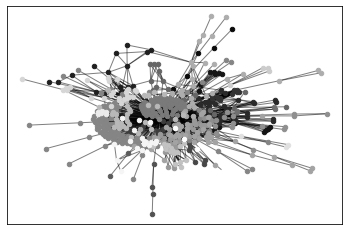

In [2182]:
#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(undir_larG)
count = 0
lv_communities=[] #bulid a list contains each community's graph.
for com in set(partition.values()) :
    count = count + 1
    # get characters in the same community
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    # append each community's graph to the list
    lv_communities.append(undir_larG.subgraph(list_nodes))
    h = nx.draw_networkx_nodes(undir_larG, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(undir_larG,pos, alpha=0.5)
plt.show()

In [2183]:
len(lv_communities)

25

### Report the value of modularity found by the algorithm. 

In [2184]:
# get keys to a list according to dict values
def get_key(val):
    temp = []
    for key, value in partition.items():
         if val == value:
            temp.append(key)
    return temp

# a list of communities detected by LV algorithm
lv_communities_list = []
for i in set(partition.values()):
    lv_communities.append(get_key(i))

modularity_lv = round(nx_comm.modularity(undir_larG,lv_communities),3)
print(modularity_lv)

0.626


In [ ]:
modularity_lv = round(nx_comm.modularity(undir_larG,lv_communities),2)
print(modularity_lv)

In [2172]:
# calculate Mc of LV algorthmns one by one and sum to M
L = len(undir_larG.edges)
M = 0
for i in set(partition.values()):
    Lc = len(get_key(i))        #这里出错了，要算分区的链接数
    Kc = 2*Lc
    Mc = Lc/L - (Kc/(2*L))**2
    M += Mc
print(M)

0.32870799690182395


It's lower than what modularity found above for races as communities.

### Visualize the network, using the Force Atlas algorithm (see Lecture 5, exercise 3). This time assign each node a different color based on their community. Describe the structure you observe.



In [1970]:
from fa2 import ForceAtlas2
forceatlas2 = ForceAtlas2()
positions = forceatlas2.forceatlas2_networkx_layout(undir_larG, pos=None, iterations=200)

100%|███████████████████████████████████████████████████████████████████████████████| 200/200 [00:01<00:00, 153.26it/s]

BarnesHut Approximation  took  0.16  seconds
Repulsion forces  took  1.06  seconds
Gravitational forces  took  0.01  seconds
Attraction forces  took  0.01  seconds
AdjustSpeedAndApplyForces step  took  0.03  seconds


In [1975]:
# get the dictionary of nodes and their degrees
d = dict(undir_larG.degree)

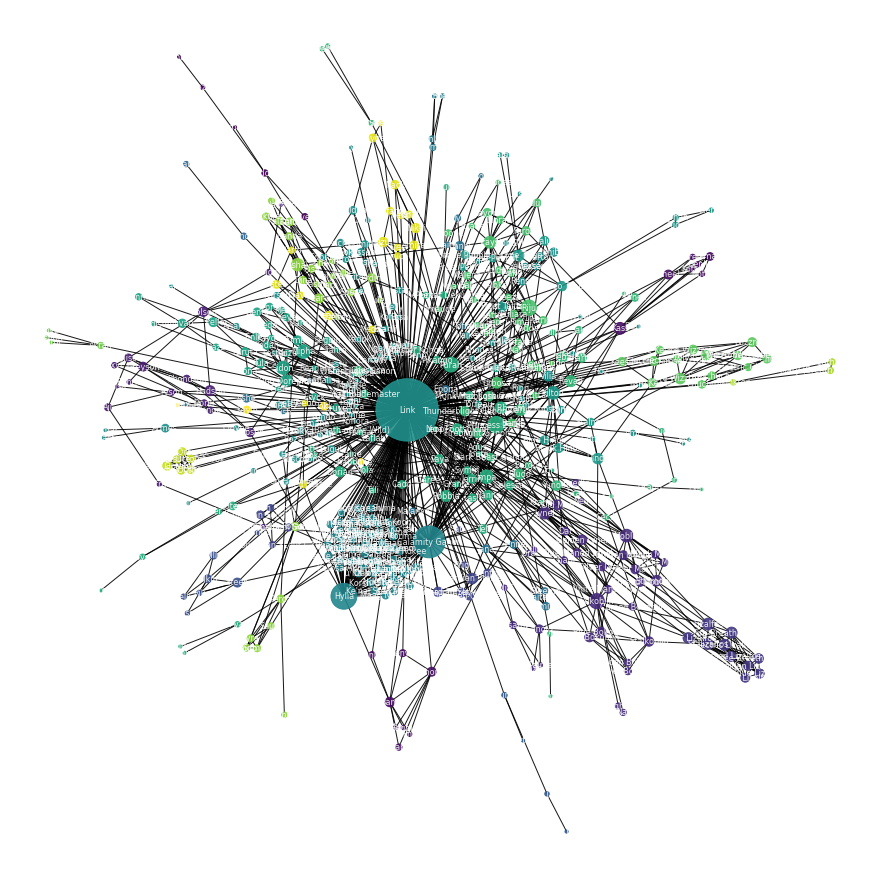

In [1976]:
plt.figure(figsize=(12,12))
values = [partition.get(node) for node in undir_larG.nodes()]
nx.draw(undir_larG, positions, cmap=plt.get_cmap('viridis'),\
        node_color=values, alpha=0.9, with_labels=True, font_size=8,font_color='white',node_size=[v*10 for v in d.values()])

### Compare the communities found by your algorithm with the races:

**create a matrix D with dimension (R×C), where R is the number of races and C is the number of communities.**

In [2178]:
R = len(communities_race) # the number of races
C = len(lv_communities) # the number of communities.

**set the entry Di,j to be the number of nodes that race i has in common with community j.
The matrix D is what we call a confusion matrix.**

**Use the confusion matrix to explain further the modularity values found in Ex. 6 and the one of communities. How well the communities you've detected correspond to the labeled races of characters in BotW? (You can repeat the steps for gender and role).**

**Visualisation of communities by race**

In [2133]:
partition_race = {}
for i in range(len(communities_race)):
    partition_race.update(dict.fromkeys(communities_race[i],i))

In [2136]:
partition_race

{'Haite': 0,
 'Bugut': 0,
 'Sagessa': 0,
 'Konba': 0,
 'Danton': 0,
 'Rozel': 0,
 'Canolo': 0,
 'Bolson': 0,
 'Galli': 0,
 'Tenne': 0,
 'Joute': 0,
 'Loone': 0,
 'Garshon': 0,
 'Numar': 0,
 'Quince': 0,
 'Karson': 0,
 'Chabi': 0,
 'Nobiro': 0,
 'Sho': 0,
 'Maypin': 0,
 'Rudi': 0,
 'Monkton': 0,
 'Nobo': 0,
 'Ashe': 0,
 'Palme': 0,
 'Dantz': 0,
 'Cloyne': 0,
 'Nazbi': 0,
 'Toma': 0,
 'Nack': 0,
 'Manny (Breath of the Wild)': 0,
 'Pondo': 0,
 'Nat': 0,
 'Piaffe': 0,
 'Geggle': 0,
 'Armes': 0,
 'Medda': 0,
 'Toffa': 0,
 'Moza': 0,
 'Teli': 0,
 'Chessica': 0,
 'Baddek': 0,
 'Leop': 0,
 'Ariane': 0,
 'Jana': 0,
 'Cambo': 0,
 'Chork': 0,
 'Ralera': 0,
 'Traysi': 0,
 'Reede': 0,
 'Agus': 0,
 'Kinov': 0,
 'Celessa': 0,
 'Benny': 0,
 'Mils': 0,
 'Princess Zelda': 0,
 'Hylia': 0,
 'Aster': 0,
 'Kenyo': 0,
 'Sebasto': 0,
 'Bozai': 0,
 'Tasseren': 0,
 'Hoz': 0,
 'Nebb': 0,
 'Glendo': 0,
 'Spinch (Hylian)': 0,
 'Harlow': 0,
 'Lester': 0,
 'Ami': 0,
 'Prissen': 0,
 'Sesami': 0,
 'Granté': 0,
 'Mayro

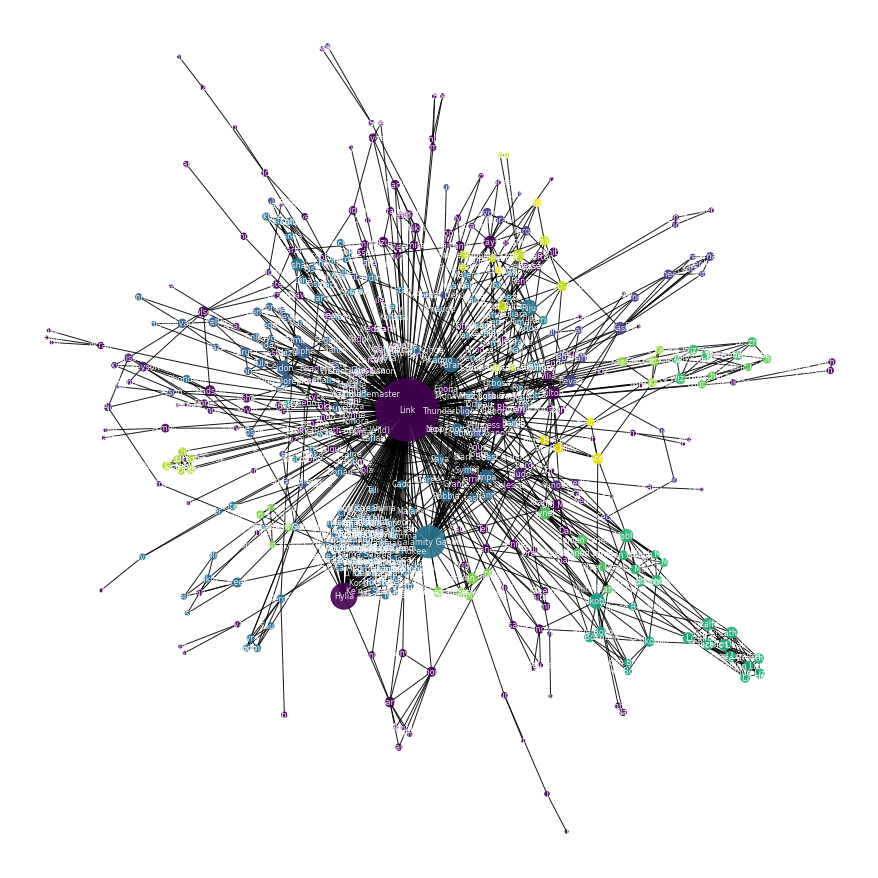

In [2134]:
plt.figure(figsize=(12,12))
values = [partition_race.get(node) for node in undir_larG.nodes()]
nx.draw(undir_larG, positions, cmap=plt.get_cmap('viridis'),\
        node_color=values, alpha=0.9, with_labels=True, \
        font_size=8,font_color='white',node_size=[v*10 for v in d.values()])